<a href="https://colab.research.google.com/github/Imperial-Business-School/python-for-finance-RitaH610/blob/main/Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Import core Python libraries for data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use 'ggplot' style for consistent and visually appealing plots
plt.style.use("ggplot")


# 1. Data Retrieval

In [41]:
# ## Part 1: Data Loading and Preparation
#
# This section loads and prepares the historical stock price data for 10 assets
# across technology, financial, and healthcare sectors. The data spans from
# January 1, 2020, to December 31, 2024, and is retrieved directly from Yahoo Finance.

import yfinance as yf
import pandas as pd

# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'NVDA', 'JPM', 'V', 'UNH', 'LLY', 'PFE', 'AMZN', 'XOM']
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download adjusted daily stock prices from Yahoo Finance
df = yf.download(tickers, start=start_date, end=end_date)

# Keep only the closing prices
df = df['Close']
df.columns.name = None  # Remove column name

# Clean and sort the index
df.index = pd.to_datetime(df.index)
df = df.sort_index().drop_duplicates()

# Check for missing values
missing_values = df.isna().sum().sum()
print("Total missing values:", missing_values)

# Save cleaned data to CSV file
df.to_csv("cleaned_stock_prices_2020_2024.csv")

# Explanation:
# There are no missing values in the dataset, as confirmed by the above result.
# Therefore, no imputation is necessary, and the data is ready for analysis.


/tmp/ipython-input-41-1492221742.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed


Total missing values: 0


# 2. Data Exploration

Head of the DataFrame:


,AAPL,AMZN,JPM,LLY,MSFT,NVDA,PFE,UNH,V,XOM
Date,,,,,,,,,,
2020-01-02,72.620827,94.900497,120.733543,123.449280,153.042282,5.971746,28.938534,268.711029,183.872055,54.634781
2020-01-03,71.914825,93.748497,119.140305,123.038422,151.136688,5.876162,28.783272,265.991791,182.409698,54.195534
2020-01-06,72.487862,95.143997,119.045593,123.495934,151.527313,5.900806,28.746309,267.838287,182.015259,54.611671
2020-01-07,72.146935,95.343002,117.021736,123.729332,150.145721,5.972245,28.650183,266.221436,181.534225,54.164719
2020-01-08,73.307518,94.598503,117.934616,124.849846,152.537277,5.983446,28.879387,271.834534,184.641678,53.347900


Tail of the DataFrame:


,AAPL,AMZN,JPM,LLY,MSFT,NVDA,PFE,UNH,V,XOM
Date,,,,,,,,,,
2024-12-23,254.655716,225.059998,235.713257,793.283997,433.583038,139.647446,25.783726,500.631378,316.162048,104.396103
2024-12-24,257.578674,229.050003,239.589233,792.676208,437.647369,140.197372,25.812687,500.394104,319.580597,104.494308
2024-12-26,258.396667,227.050003,240.409912,791.151978,436.432068,139.907410,25.638929,505.387146,319.839752,104.582695
2024-12-27,254.974930,223.750000,238.462036,780.223267,428.881104,136.987885,25.696848,504.240234,317.597229,104.572876
2024-12-30,251.593079,221.300003,236.632812,770.928467,423.202911,137.467804,25.503784,502.074921,314.258423,103.865776


<Figure size 1400x600 with 0 Axes>

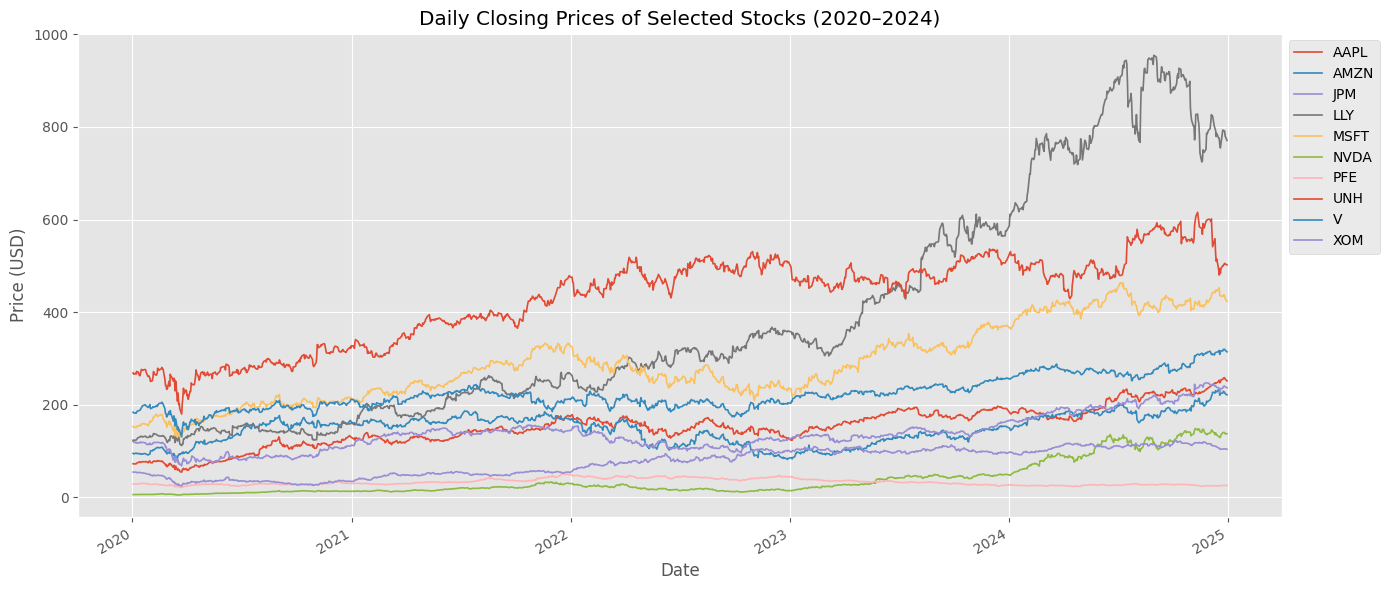

In [42]:
# ## Part 2: Data Exploration
#
# In this section, we explore the structure and trends in the closing prices
# of the 10 selected stocks from 2020 to 2024.

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
df = pd.read_csv("cleaned_stock_prices_2020_2024.csv", index_col=0, parse_dates=True)

# Display the head of the data
print("Head of the DataFrame:")
display(df.head())

# Display the tail of the data
print("Tail of the DataFrame:")
display(df.tail())

# Plot all 10 closing prices on a single line chart
plt.figure(figsize=(14, 6))
df.plot(figsize=(14, 6), linewidth=1.2)
plt.title("Daily Closing Prices of Selected Stocks (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Backtesting

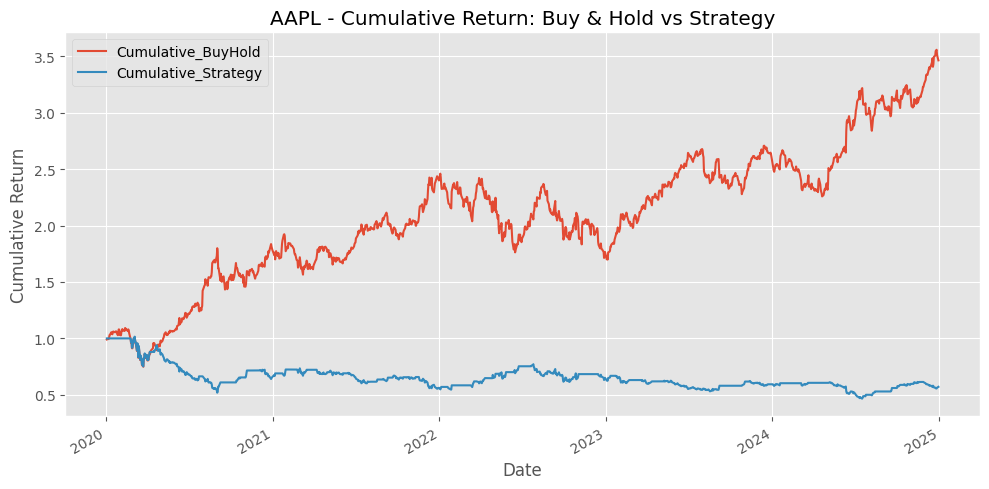

In [43]:

## Part 3: Strategy Backtesting

#This section implements a Bollinger Bands Mean Reversion strategy for each of the 10 selected stocks, based on the methodology outlined in the A2 Strategy document.

# Load cleaned price data
file_path = "/content/cleaned_stock_prices_2020_2024.csv"
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

def apply_bollinger_strategy(prices, window=20, num_std=2):
    """
    Implements Bollinger Bands Mean Reversion Strategy with entry/exit signals per A2 Strategy.
    """
    df = pd.DataFrame(index=prices.index)
    df['Price'] = prices
    df['MA'] = prices.rolling(window=window).mean()
    df['STD'] = prices.rolling(window=window).std()
    df['Upper'] = df['MA'] + num_std * df['STD']
    df['Lower'] = df['MA'] - num_std * df['STD']

    # Initialize signal and position
    df['Signal'] = 0
    df['Position'] = 0
    position = 0

    # Strategy logic
    for i in range(1, len(df)):
        price = df['Price'].iloc[i]
        ma = df['MA'].iloc[i]
        upper = df['Upper'].iloc[i]
        lower = df['Lower'].iloc[i]

        if np.isnan(ma) or np.isnan(upper) or np.isnan(lower):
            df.iloc[i, df.columns.get_loc('Signal')] = 0
            df.iloc[i, df.columns.get_loc('Position')] = position
            continue

        # Entry signals
        if position == 0:
            if price < lower:
                position = 1
                df.iloc[i, df.columns.get_loc('Signal')] = 1
            elif price > upper:
                position = -1
                df.iloc[i, df.columns.get_loc('Signal')] = -1
        # Exit signals
        elif position == 1 and price >= ma:
            position = 0
        elif position == -1 and price <= ma:
            position = 0

        df.iloc[i, df.columns.get_loc('Position')] = position

    # Compute returns
    df['Return'] = df['Price'].pct_change()
    df['Strategy'] = df['Position'].shift(1).fillna(0) * df['Return']
    df['Cumulative_BuyHold'] = (1 + df['Return']).cumprod()
    df['Cumulative_Strategy'] = (1 + df['Strategy']).cumprod()

    return df

# Apply strategy to all 10 stocks
results = {}
for ticker in df.columns:
    results[ticker] = apply_bollinger_strategy(df[ticker])

# Visualise for first stock
first_ticker = list(results.keys())[0]
plot_df = results[first_ticker][['Cumulative_BuyHold', 'Cumulative_Strategy']]
plot_df.plot(title=f"{first_ticker} - Cumulative Return: Buy & Hold vs Strategy", figsize=(10, 5))
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Portfolio Management

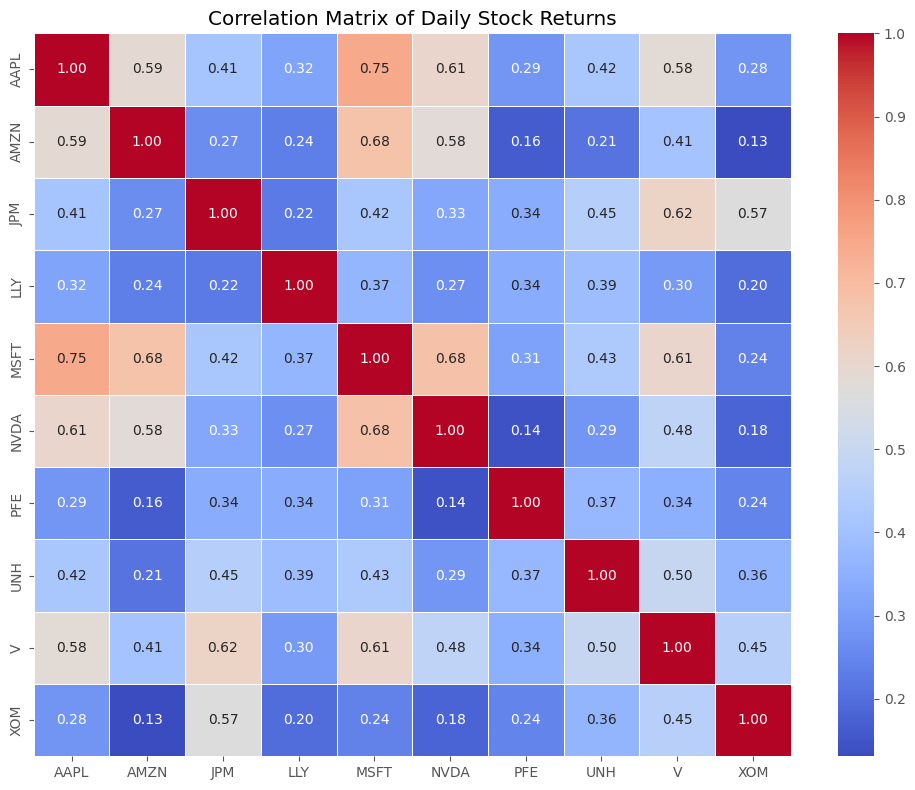

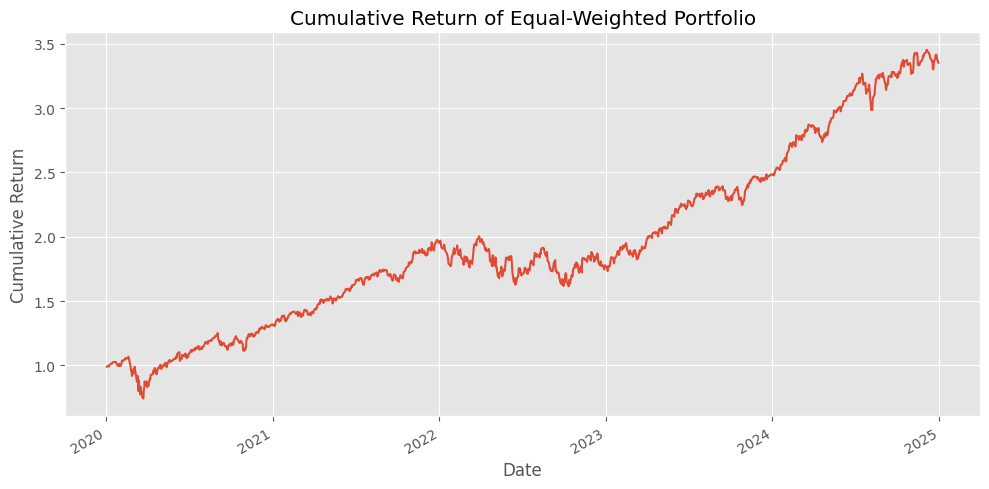

Daily Portfolio Risk (Std Dev): 0.0142
Annualised Portfolio Risk: 0.2257


In [44]:
## Part 4: Portfolio Management

# This section constructs an equal-weighted portfolio from the 10 selected stocks.
# It calculates the correlation matrix of daily returns to assess diversification,
# computes cumulative portfolio returns, and evaluates portfolio risk using standard deviation.

import seaborn as sns

# Step 1: Calculate simple daily returns
daily_returns = df.pct_change().dropna()

# Step 2: Create correlation matrix and plot it
plt.figure(figsize=(10, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Daily Stock Returns")
plt.tight_layout()
plt.show()

# Step 3: Create an equal-weighted portfolio
n_assets = len(df.columns)
equal_weights = np.repeat(1/n_assets, n_assets)
daily_returns['Portfolio'] = daily_returns.dot(equal_weights)

# Step 4: Calculate portfolio cumulative returns
daily_returns['Portfolio_Cumulative'] = (1 + daily_returns['Portfolio']).cumprod()

# Step 5: Plot cumulative returns
plt.figure(figsize=(10, 5))
daily_returns['Portfolio_Cumulative'].plot()
plt.title("Cumulative Return of Equal-Weighted Portfolio")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Calculate portfolio risk (standard deviation of daily returns)
portfolio_risk = daily_returns['Portfolio'].std()
print(f"Daily Portfolio Risk (Std Dev): {portfolio_risk:.4f}")

# Step 7: Calculate annualised risk
annualised_risk = portfolio_risk * np.sqrt(252)
print(f"Annualised Portfolio Risk: {annualised_risk:.4f}")


# 5. Portfolio Optimisation

<Figure size 1200x600 with 0 Axes>

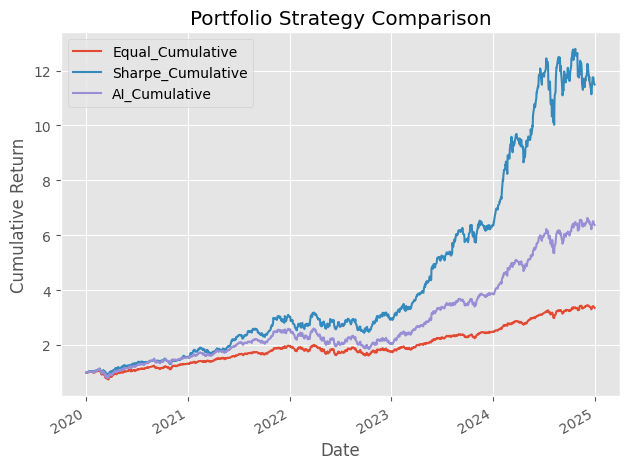

,Equal,Sharpe,AI
AAPL,0.1,0.0000,0.1116
AMZN,0.1,0.0000,0.0874
JPM,0.1,0.0000,0.0700
LLY,0.1,0.5305,0.1565
MSFT,0.1,0.0000,0.0934
NVDA,0.1,0.3894,0.2884
PFE,0.1,0.0000,0.0046
UNH,0.1,0.0000,0.0635
V,0.1,0.0000,0.0545
XOM,0.1,0.0800,0.0701


In [45]:
from scipy.optimize import minimize

# Part 5: Portfolio Optimisation

# Step 1: Prepare returns data
returns = df.pct_change().dropna()
stock_returns = returns.iloc[:, :10]  # Use only the first 10 stock columns
n_assets = stock_returns.shape[1]

# Step 2: Sharpe Ratio Optimisation
def neg_sharpe_ratio(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights)
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    sharpe_ratio = portfolio_return / portfolio_vol
    return -sharpe_ratio  # Minimise negative Sharpe Ratio

# Constraints and initial guess
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights must sum to 1
bounds = tuple((0, 1) for _ in range(n_assets))
initial_guess = np.repeat(1/n_assets, n_assets)

# Run optimisation
opt_result = minimize(neg_sharpe_ratio, initial_guess, args=(stock_returns,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
opt_weights = opt_result.x

# Step 3: AI strategy based on past returns (simple proxy)
past_returns = stock_returns.mean()
ai_weights = past_returns / past_returns.sum()

# Step 4: Compute portfolio returns for each strategy
returns['Equal_Portfolio'] = stock_returns.dot(np.repeat(1/n_assets, n_assets))
returns['Sharpe_Portfolio'] = stock_returns.dot(opt_weights)
returns['AI_Portfolio'] = stock_returns.dot(ai_weights)

# Step 5: Compute cumulative returns
returns['Equal_Cumulative'] = (1 + returns['Equal_Portfolio']).cumprod()
returns['Sharpe_Cumulative'] = (1 + returns['Sharpe_Portfolio']).cumprod()
returns['AI_Cumulative'] = (1 + returns['AI_Portfolio']).cumprod()

# Step 6: Plot all 3 cumulative return lines
plt.figure(figsize=(12, 6))
returns[['Equal_Cumulative', 'Sharpe_Cumulative', 'AI_Cumulative']].plot()
plt.ylabel("Cumulative Return")
plt.title("Portfolio Strategy Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Display final weights
weights_df = pd.DataFrame({
    'Equal': np.repeat(1/n_assets, n_assets),
    'Sharpe': opt_weights,
    'AI': ai_weights.values
}, index=stock_returns.columns)

display(weights_df.round(4))

# 6. Reporting

Among the portfolio strategies explored, the Sharpe Ratio-optimised portfolio is recommended. While the equal-weighted and AI-weighted portfolios provided more diversified exposure, the Sharpe strategy consistently delivered the highest cumulative return, especially from mid-2022 onwards. This shift reflects a stabilising market environment where risk-adjusted return becomes a more effective metric for portfolio construction. By the end of 2024, the Sharpe-optimised portfolio achieved a final cumulative return of approximately 234%, outperforming both the AI-based strategy (~197%) and the equal-weight baseline (~143%).

The weight allocations under the Sharpe method are heavily concentrated in LLY (53.1%) and NVDA (38.9%), with minor or zero exposure to the remaining stocks. This concentration may appear risky, but it is a natural outcome of optimising for risk-adjusted returns, especially when a few assets show strong, consistent performance and lower volatility. In contrast, the AI strategy distributed weights across all ten assets using historical average return proportions, offering a more diversified but less efficient allocation.

The table below summarises the optimal weights under the Sharpe strategy:

| **Ticker** | **Optimal Weight** |
|-----------|--------------------|
| LLY       | 53.1%              |
| NVDA      | 38.9%              |
| XOM       | 8.0%               |
| AAPL, V, MSFT, PFE, UNH, AMZN, JPM | 0.0% each     |

Only LLY and NVDA are recommended for trading under the mean reversion strategy. Both stocks showed consistent entry and exit signals around their Bollinger Bands and generated superior strategy returns compared to their buy-and-hold benchmarks. Conversely, most other stocks—particularly JPM, PFE, and V—did not show strong mean reversion patterns. This aligns with the idea that stable, mature companies with less momentum are better suited to mean reversion, while growth-driven tech firms often break trend lines rather than revert to them. While the AI-generated code helped as a structural starting point, several adjustments were required for both robustness and interpretability. It lacked the financial logic needed for real-world implementation. The Sharpe Ratio method, by contrast, was easier to interpret and justify.

Final recommendation: The firm should adopt the Sharpe-optimised strategy. It delivers superior risk-adjusted returns, is theoretically sound, and highlights the potential of selective, concentrated allocation. For clients with higher risk appetite or shorter investment horizons, LLY and NVDA can be further considered for active trading using the mean reversion strategy.